## Necessary Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# To ignore the warnings 

import warnings as wg
wg.filterwarnings("ignore")

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


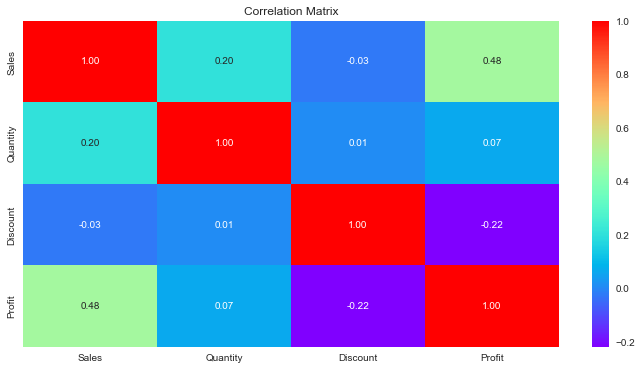

In [51]:
plt.figure(figsize=(12,6))
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True, fmt='.2f', cbar=True, cmap='rainbow')
plt.show();

In [9]:
data.duplicated().sum()

17

In [10]:
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
data = data.drop(['Postal Code'],axis=1)

In [12]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Visualizing Categories

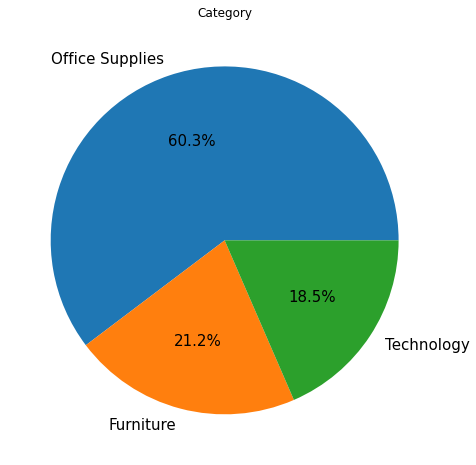

In [15]:
plt.figure(figsize = (8,8))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(data['Category'].value_counts(), 
        labels=data['Category'].value_counts().index,autopct='%1.1f%%',
        textprops = textprops)
plt.show();

<Figure size 864x432 with 0 Axes>

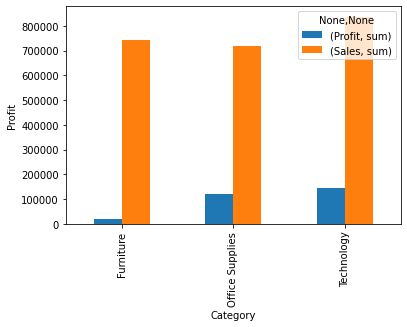

In [19]:
plt.figure(figsize= (12,6))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show();

## Visualizing Categories vs Profit

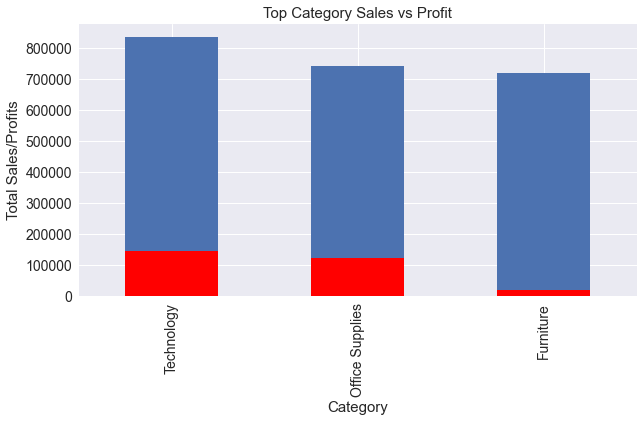

In [21]:
# computing top categories in terms of sales from first 100 observations

top_category_s = data.groupby("Category").Sales.sum().nlargest(n=100)

# computing top categories in terms of profit from first 100 observations

top_category_p = data.groupby("Category").Profit.sum().nlargest(n=100)

# plotting to see it visually

plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show();

## Visualizing the sub categories

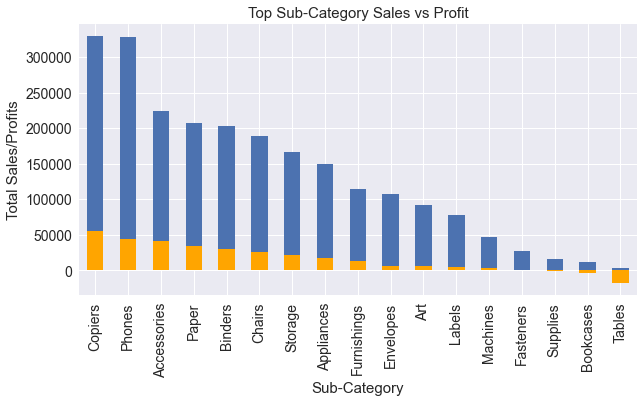

In [22]:
# computing top sub-categories in terms of sales from first 100 observations

top_subcategory_s = data.groupby("Sub-Category").Sales.sum().nlargest(n = 100)

# computing top sub-categories in terms of profit from first 100 observations

top_subcategory_p = data.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

# plotting to see it visually

plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'orange')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

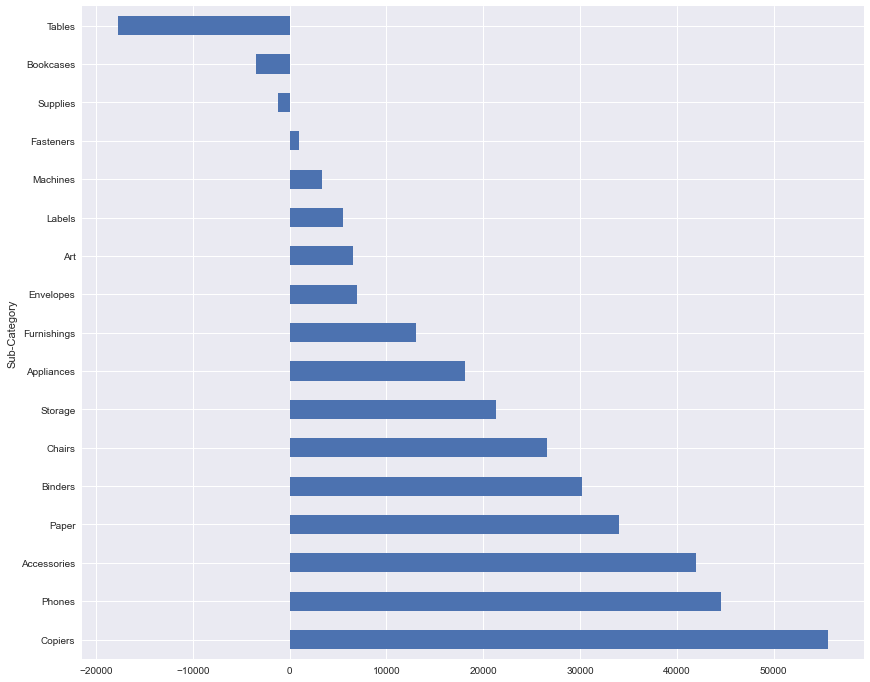

In [24]:
# A more detailed view
plt.figure(figsize=(14,12))
statewise = data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh();

## Visualizing the discount

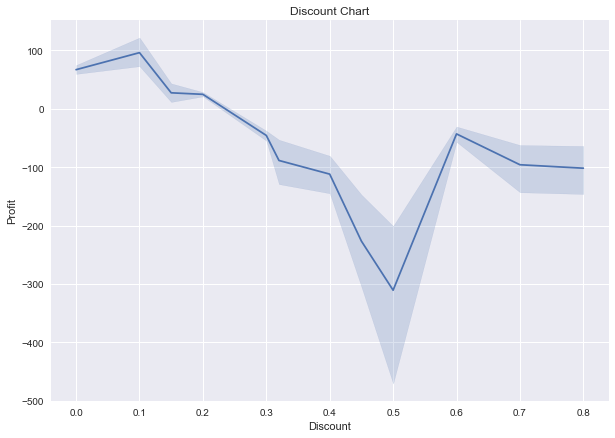

In [31]:
plt.figure(figsize=(10,7))
plt.title('Discount Chart')
sns.lineplot(data['Discount'], data['Profit'], data=data);

## Visualizing the Sales vs Profits in different Regions

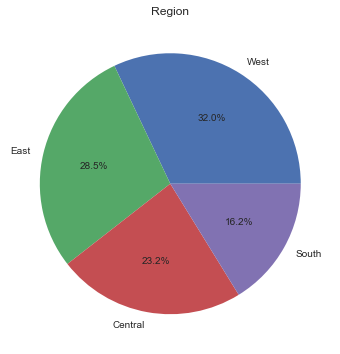

In [35]:
plt.figure(figsize = (10,6))
plt.title('Region')
plt.pie(data['Region'].value_counts(), labels=data['Region'].value_counts().index,autopct='%1.1f%%')
plt.show();

## Visualizing the Sales vs Profits in different states

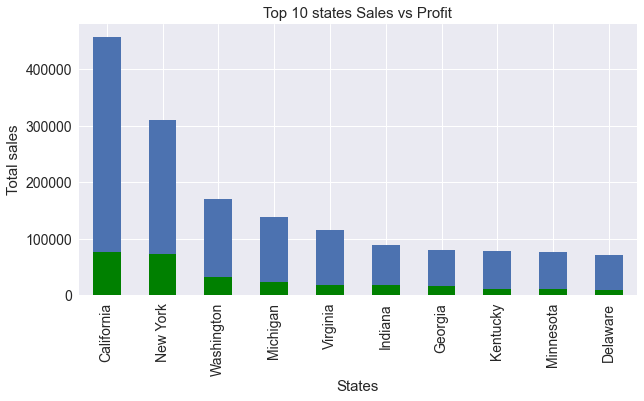

In [37]:
# computing top states in terms of sales from first 10 observations

top_states_s = data.groupby("State").Sales.sum().nlargest(n=10)

# computing top states in terms of profit from first 10 observations

top_states_p = data.groupby("State").Profit.sum().nlargest(n = 10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'green')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 10 states Sales vs Profit",fontsize = 15)
plt.show()

## Checking the interdependency of Sales,Profits and Discounts

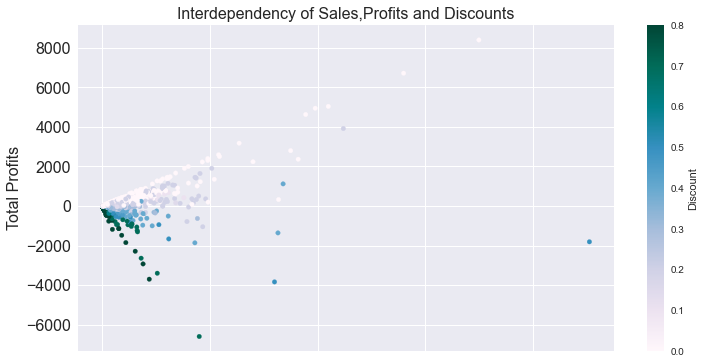

In [46]:
plt.style.use('seaborn')
data.plot(kind = "scatter", 
             figsize = (12, 6), 
             x = "Sales", 
             y= "Profit", 
             c = "Discount", 
             s = 20, 
             fontsize = 16, 
             colormap = "PuBuGn")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show();

## Conclusion :
The weak areas where one can work to make more profit are :

    1.We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.
    2.Considering the sub-categories sales of tables should be minimized.
    3.Increase sales more in the east as profit is more.
    4.We should concentrate on the states like 'New York' and 'California' to make more profits.